In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.problems.run import compute_utils_per_params
import numpy as np
import json
import cvxpy as cp
from src.problems.visualizations import plot_groups_results_per_gamma, plot_groups_results_std_per_alpha, plot_groups_results_means_per_alpha
import time
from pathlib import Path

(CVXPY) Apr 24 10:05:15 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.12.4544). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 24 10:05:15 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.12.4544). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [3]:
def save_results(results, save_path, method, groups, n_consumers, n_producers, k_rec, gammas, alphas):
    Path(save_path).mkdir(parents=True, exist_ok=True)

    results_dict = {
        "results": results,
        "method": method,
        "groups": groups,
        "n_consumers": n_consumers,
        "n_producers": n_producers,
        "k_rec": k_rec,
        "gammas": gammas,
        "alphas": alphas
    }
    subpath = f"{method}_{'_'.join(groups)}_{n_consumers}_{n_producers}_{k_rec}_{'_'.join(map(str, gammas))}_{'_'.join(map(str, alphas))}"
    with open(f"{save_path}/{subpath}.json", "w") as f:
        json.dump(results_dict, f)

In [4]:
# load data
with open("./data/amazon_predictions.npy", "rb") as f:
    REL_MATRIX = np.load(f)

with open("./data/amazon_user_groups.json", "r") as f:
    GROUPS_MAP = json.load(f)

In [5]:
N_RUNS = 3
N_CONSUMERS = 500
N_PRODUCERS = 200
K_REC = 10
# GAMMAS = [0, 0.1, 0.35, 0.7, 1]
GAMMAS = [0, 0.1, 0.35, 0.5, 0.75, 1]
ALPHAS = [0.95]
GROUPS = ["top_category", "usage_group"]
METHOD = "mean"
SOLVER = cp.GUROBI
TIMESTAMP = int(time.time())
SAVE_PATH = f"./results/{TIMESTAMP}"

In [7]:
for method in ["min", "mean"]:
    results = compute_utils_per_params(
        rel_matrix=REL_MATRIX,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        k_rec=K_REC,
        gammas=GAMMAS,
        alphas=ALPHAS,
        groups_map=GROUPS_MAP,
        group_keys=GROUPS,
        solver=SOLVER,
        method=method,
        n_runs=N_RUNS,
    )

    save_results(
        results=results,
        save_path=SAVE_PATH,
        method=method,
        groups=GROUPS,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        k_rec=K_REC,
        gammas=GAMMAS,
        alphas=ALPHAS
    )

Runs:   0%|                                                                                                                                                                                                          | 0/3 [00:00<?, ?it/s]






Runs:  33%|████████████████████████████████████████████████████████████████▋                                                                                                                                 | 1/3 [00:51<01:43, 51.54s/it]






Runs:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 2/3 [02:08<01:06, 66.73s/it]






Runs:   0%|                                                                                                                                                                                                          | 0/3 [00:00<?, ?it/s]






Runs:  33%|█████████████████████

In [6]:
for method in ["min", "mean"]:
    results = compute_utils_per_params(
        rel_matrix=REL_MATRIX,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        k_rec=K_REC,
        gammas=GAMMAS,
        alphas=ALPHAS,
        groups_map=GROUPS_MAP,
        group_keys=GROUPS,
        solver=SOLVER,
        method=method,
        n_runs=N_RUNS,
    )

    save_results(
        results=results,
        save_path=SAVE_PATH,
        method=method,
        groups=GROUPS,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        k_rec=K_REC,
        gammas=GAMMAS,
        alphas=ALPHAS
    )

    for group in GROUPS:
        plot_groups_results_per_gamma(
            results=results[group],
            groups_key=group,
            n_consumers=N_CONSUMERS,
            n_producers=N_PRODUCERS,
            n_runs=N_RUNS,
            k_rec=K_REC,
            method=method,
            save_path=SAVE_PATH
        )

Runs:   0%|                                                                                                                                                                                                          | 0/3 [00:00<?, ?it/s]

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2653936
Academic license 2653936 - for non-commercial use only - registered to do___@student.uva.nl





Runs:   0%|                                                                                                                                                                                                          | 0/3 [00:15<?, ?it/s]


KeyboardInterrupt: 

In [6]:
gammas = [0, 0.1, 0.35, 0.5, 0.75, 1]
alphas = [0]

for k_rec in [1, 5, 10]:
    results = compute_utils_per_params(
        rel_matrix=REL_MATRIX,
        n_consumers=300,
        n_producers=100,
        k_rec=k_rec,
        gammas=gammas,
        alphas=alphas,
        groups_map=GROUPS_MAP,
        group_keys=["usage_group"],
        solver=SOLVER,
        method="min",
        n_runs=3,
        normalize=False,
    )

    save_results(
        results=results,
        save_path=SAVE_PATH,
        method="min",
        groups=["usage_group"],
        n_consumers=300,
        n_producers=100,
        k_rec=k_rec,
        gammas=gammas,
        alphas=alphas,
    )

Runs:   0%|                                                                                                               | 0/3 [00:00<?, ?it/s]

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2653936
Academic license 2653936 - for non-commercial use only - registered to do___@student.uva.nl









Runs:  33%|██████████████████████████████████▎                                                                    | 1/3 [01:32<03:04, 92.07s/it]






Runs:  67%|████████████████████████████████████████████████████████████████████▋                                  | 2/3 [02:25<01:09, 69.11s/it]






Runs:   0%|                                                                                                               | 0/3 [00:00<?, ?it/s]






Runs:  33%|██████████████████████████████████▎                                                                    | 1/3 [00:17<00:35, 17.55s/it]






Runs:  67%|████████████████████████████████████████████████████████████████████▋                                  | 2/3 [00:35<00:17, 17.60s/it]






Runs:   0%|                                                                                                               | 0/3 [00:00<?, ?it/s]






Runs:  33%|██████████████████████████████████▎                                         

/gpfs/home6/dseputis1/github/msc-thesis/src/problems/visualizations.py:126: SyntaxWarning: invalid escape sequence '\g'
  label=f"$\gamma$ {gamma}",
/gpfs/home6/dseputis1/github/msc-thesis/src/problems/visualizations.py:197: SyntaxWarning: invalid escape sequence '\g'
  label=f"$\gamma$ {gamma}",


Alphas: dict_keys([0, 0.25, 0.5, 0.7, 0.95])
Alphas: dict_keys([0, 0.25, 0.5, 0.7, 0.95])


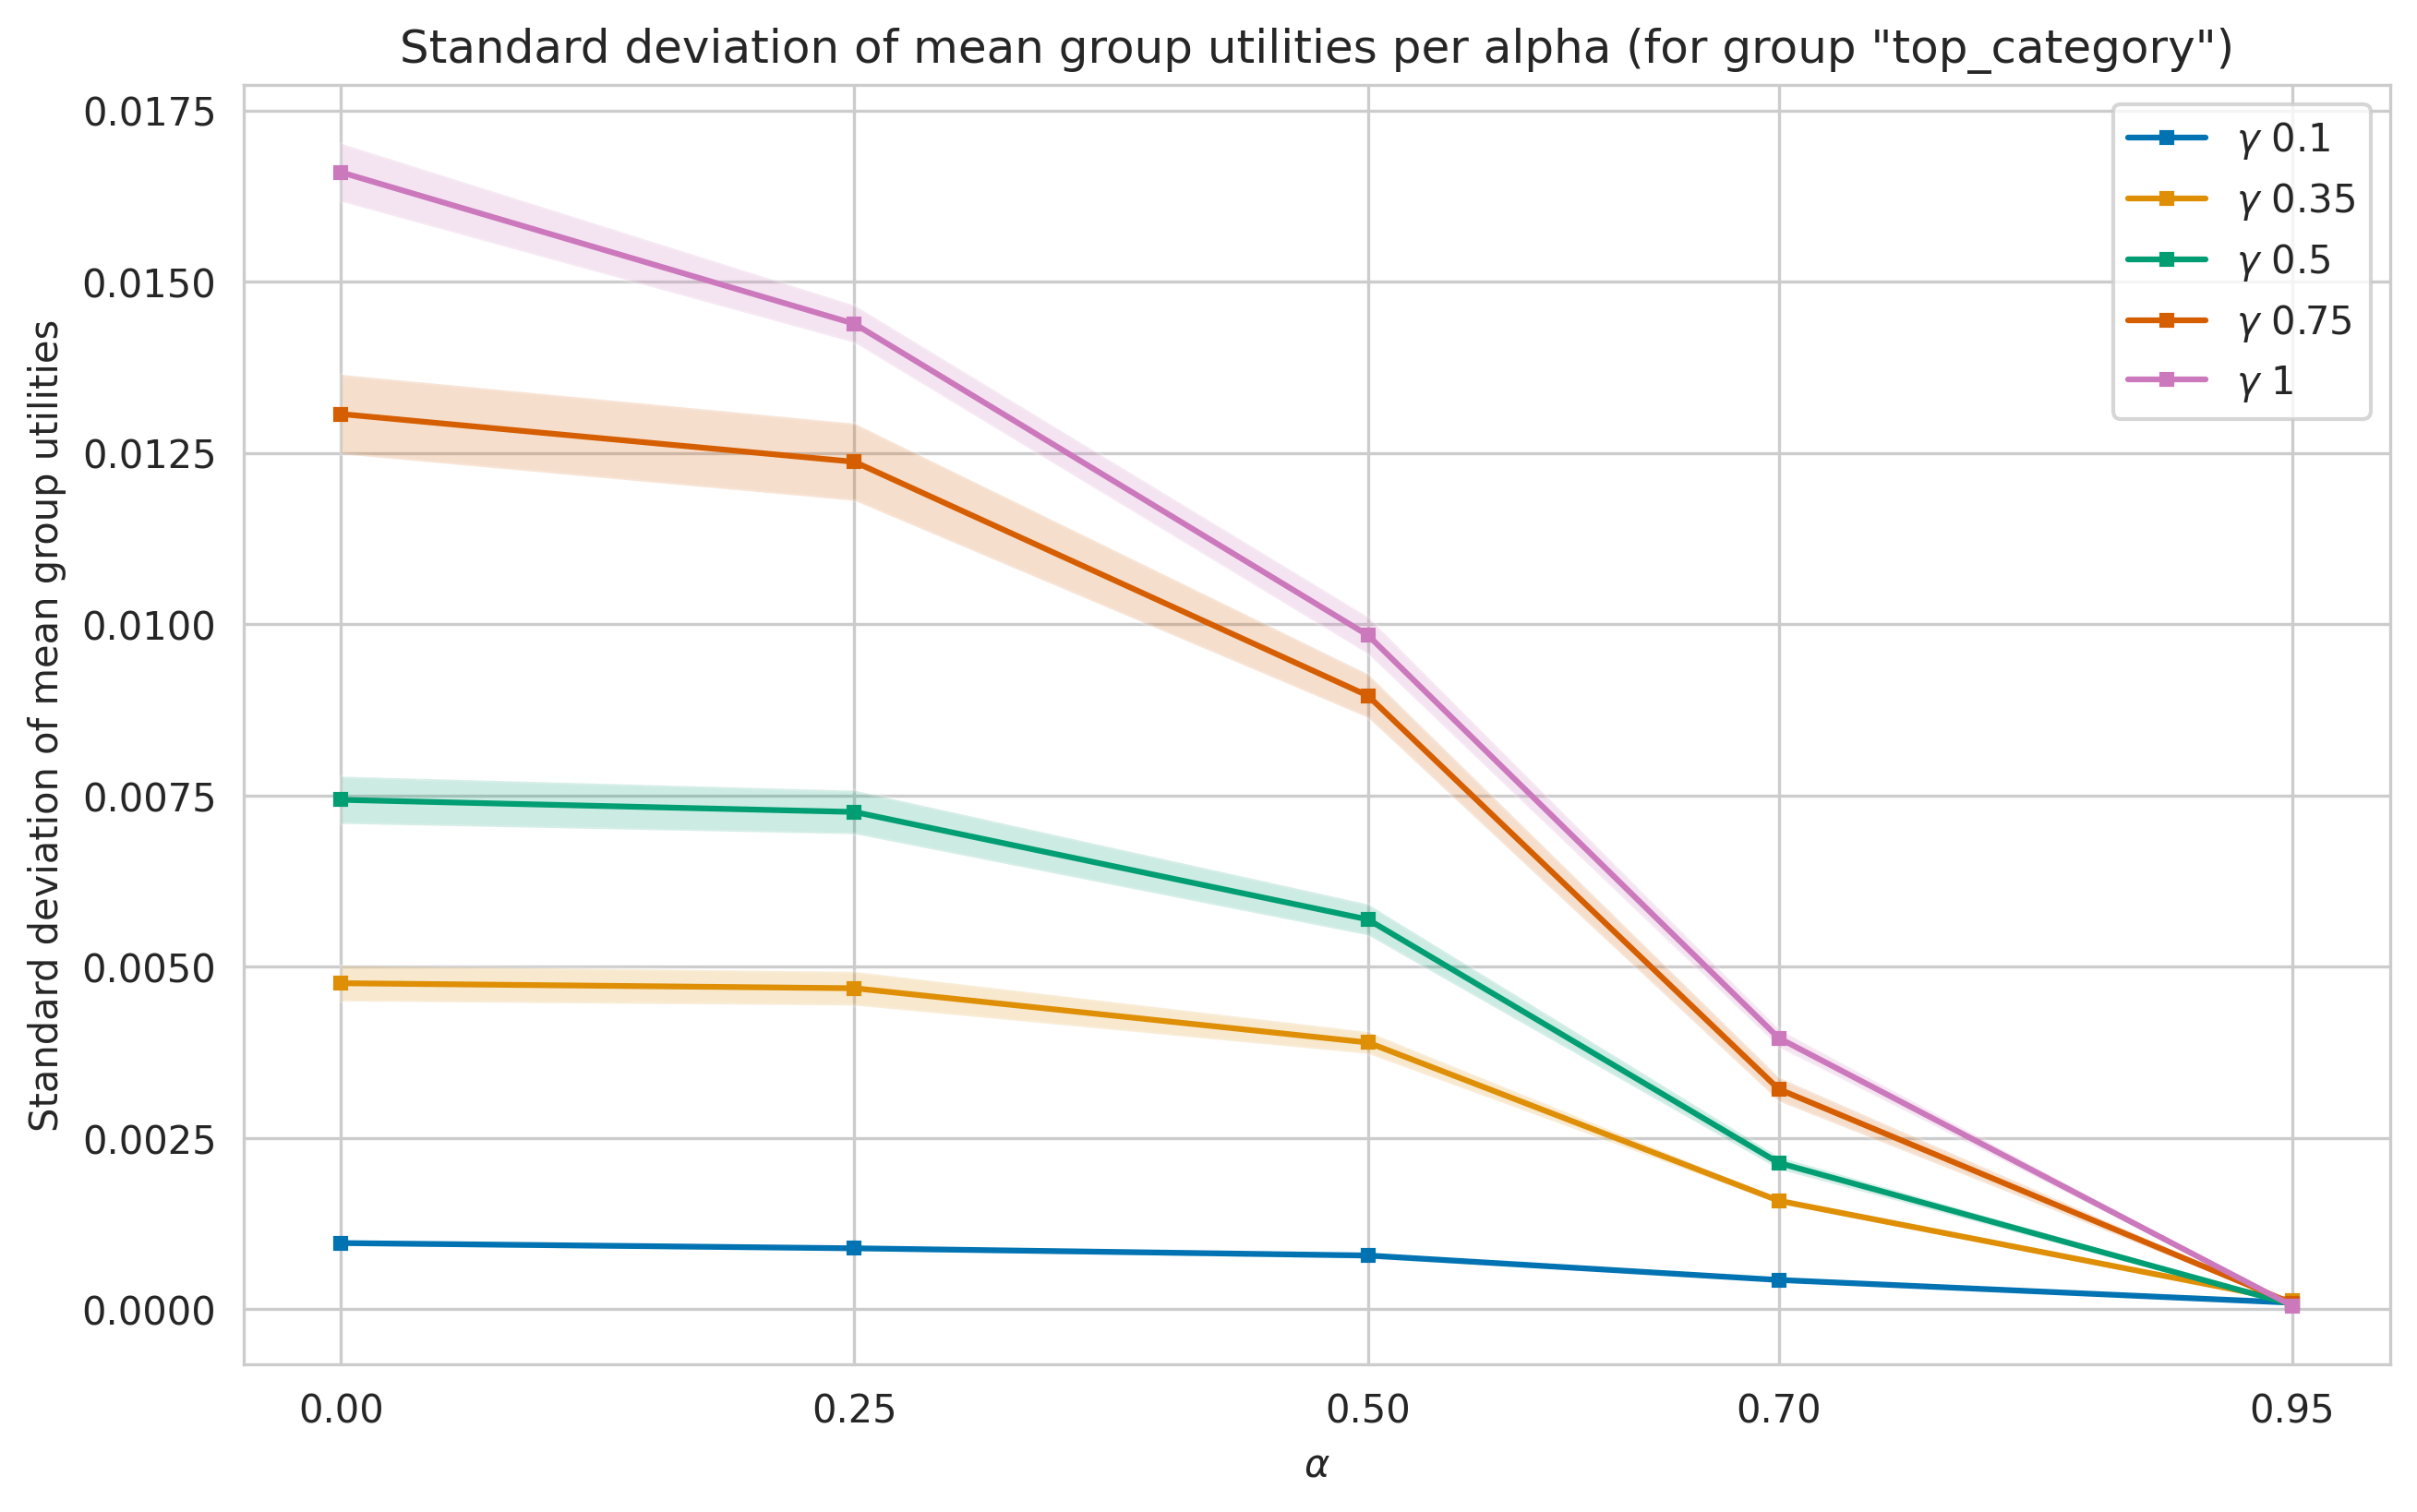

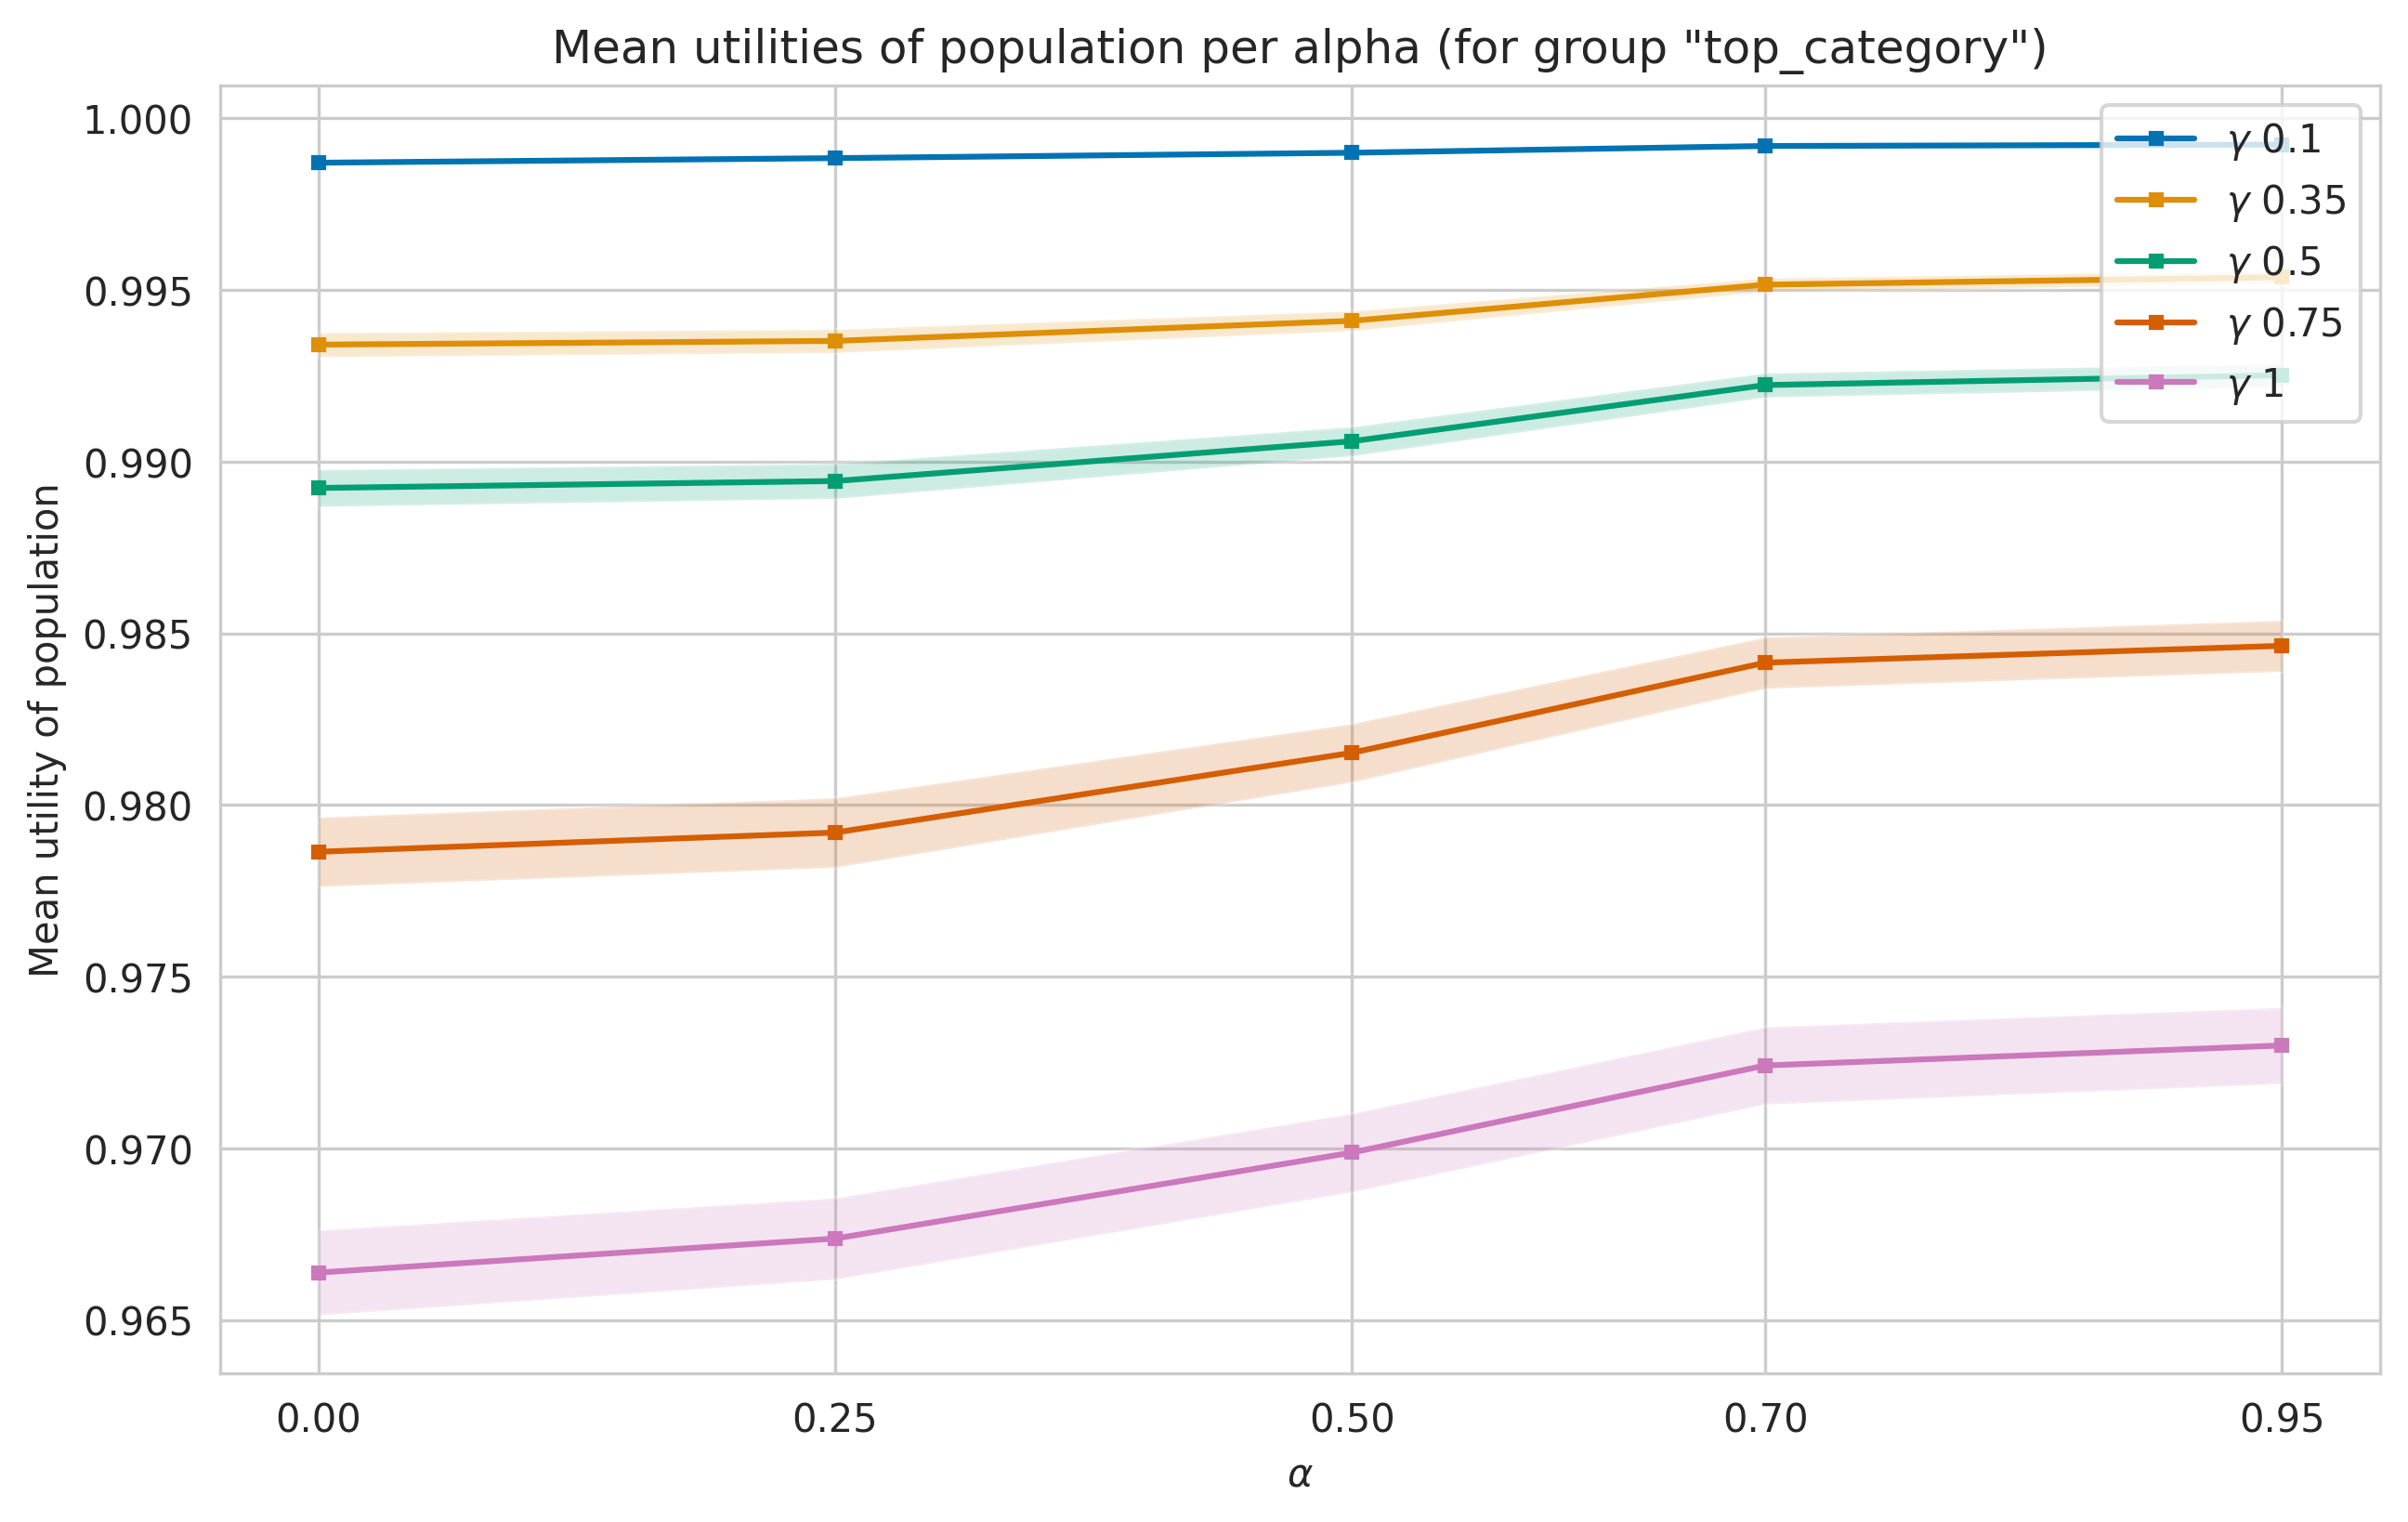

In [ ]:
for group in ["top_category"]:
    plot_groups_results_std_per_alpha(
        results=results[group],
        groups_key=group,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        n_runs=N_RUNS,
        k_rec=K_REC,
        save_path="results/"
    )

    plot_groups_results_means_per_alpha(
        results=results[group],
        groups_key=group,
        n_consumers=N_CONSUMERS,
        n_producers=N_PRODUCERS,
        n_runs=N_RUNS,
        k_rec=K_REC,
        save_path="results/"
    )